In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_excel('/content/C├│pia de aprovacao_alunos.xlsx')

In [4]:
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [5]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


<Axes: xlabel='ano_2015', ylabel='Count'>

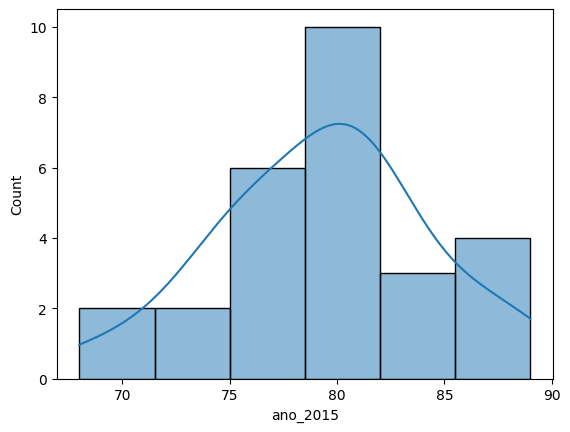

In [6]:
sns.histplot(df, x='ano_2015', kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

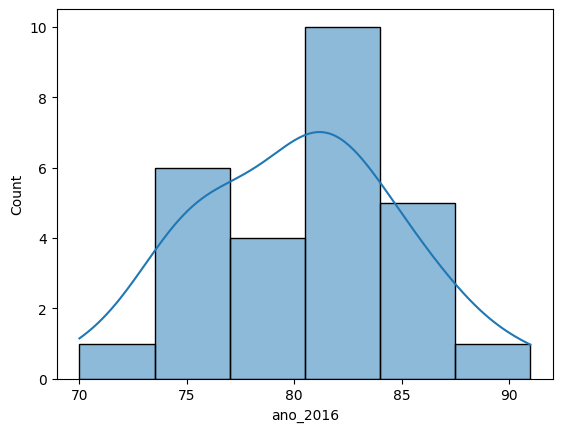

In [7]:
sns.histplot(df, x='ano_2016', kde=True)

<Axes: xlabel='ano_2016', ylabel='ano_2015'>

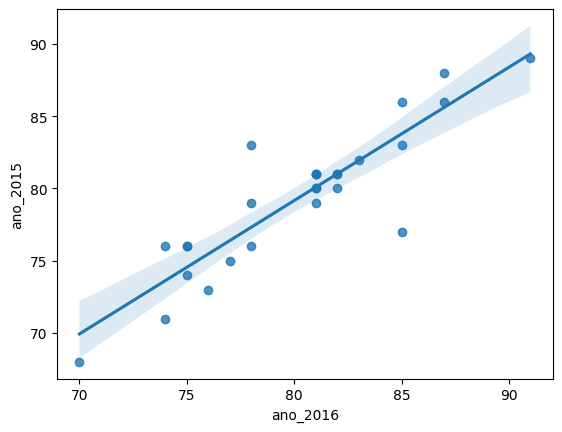

In [8]:
sns.regplot(x='ano_2016', y='ano_2015', data=df)

In [9]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
# Normalizando os dados
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [17]:
df_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [19]:
df_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


Regressão

In [20]:
x =df_norm[['ano_2015']]
y =df_norm[['ano_2016']]

In [22]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
# Medindo o R2
# R2 bem alto o que quer dizer boa relação
r_sq = lr.score(x_train, y_train)
print(r_sq)

0.8800910056640281


In [33]:
# Predizendo as metricas de treino
y_pred_train = lr.predict(x_train)

print('MAE', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE 0.06313092719197842
MSE 0.006947385853516443
RMSE 0.08335097991935334


In [34]:
# Predizendo as metricas de teste
y_pred_test = lr.predict(x_test)

print('MAE', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE 0.10156392395533688
MSE 0.02234792217796548
RMSE 0.14949221443929941


Visto que esse modelo não tem valores de erros altos, ou seja, ele consegue performar bem para as analises

Stasmodel

In [32]:
import statsmodels.formula.api as smf
function='ano_2016~ano_2015'

model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.02e-10
Time:                        10:52:19   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7